In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pokemon = pd.read_csv('pokemon.csv', encoding='latin1')
combat = pd.read_csv('combats.csv', encoding='latin1')

#Normalize numeric values
names = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for col in names:
    pokemon[col] = (pokemon[col] - pokemon[col].min()) / (pokemon[col].max() - pokemon[col].min())

pokemon = pd.get_dummies(pokemon, columns=['Type 1', ], dtype=int)
pokemon = pd.get_dummies(pokemon, columns=['Type 2', ], dtype=int)
#Dropping Features and encoding True/False
pokemon = pokemon.drop('Name', axis=1)
pokemon = pokemon.drop('Legendary', axis=1)
pokemon = pokemon.drop('Generation', axis=1)
y = combat['Winner']
combat=combat.drop('Winner', axis=1)

In [2]:
# Encode y as true or false. True if the first pokemon wins and false if the second pokemon wins.
for i in range(len(combat)):
    if y[i] == combat['First_pokemon'][i]:
        y[i]=1
    else:
        y[i]=0

In [5]:
cols = pokemon.drop('#', axis=1).columns
merged1 = combat.merge(pokemon, left_on='First_pokemon', right_on='#', how='left')
merged1 = merged1.drop(columns=['#'])
merged1.columns = ['First_pokemon', 'Second_pokemon'] + [col + '1' for col in cols]

# Step 3: Merge with pokemon data for Second_pokemon
merged2 = merged1.merge(pokemon, left_on='Second_pokemon', right_on='#', how='left')
merged2 = merged2.drop(columns=['#', 'First_pokemon', 'Second_pokemon'])
merged2.columns = merged1.columns.tolist()[2:] + [col + '2' for col in cols]

# Final DataFrame
df = merged2
# df.head()
df

,Type 11,Type 21,HP1,Attack1,Defense1,Sp. Atk1,Sp. Def1,Speed1,Legendary1,Type 12,Type 22,HP2,Attack2,Defense2,Sp. Atk2,Sp. Def2,Speed2,Legendary2
0,15,10,0.192913,0.318919,0.200000,0.190217,0.142857,0.205714,0,9,1,0.271654,0.351351,0.155556,0.271739,0.095238,0.314286,0
1,9,5,0.354331,0.459459,0.297778,0.434783,0.519048,0.588571,1,15,5,0.354331,0.670270,0.377778,0.336957,0.333333,0.588571,1
2,4,7,0.212598,0.189189,0.355556,0.380435,0.404762,0.200000,0,14,18,0.291339,0.378378,0.311111,0.625000,0.357143,0.200000,0
3,6,18,0.153543,0.189189,0.155556,0.326087,0.095238,0.085714,0,2,18,0.299213,0.621622,0.377778,0.271739,0.333333,0.245714,0
4,15,17,0.271654,0.297297,0.533333,0.570652,0.238095,0.285714,0,0,15,0.074803,0.027027,1.000000,0.000000,1.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,6,0.389764,0.621622,0.422222,0.760870,0.476190,0.485714,1,17,18,0.114173,0.189189,0.288889,0.326087,0.023810,0.314286,0
49996,10,18,0.232283,0.432432,0.155556,0.108696,0.119048,0.360000,0,3,18,0.133858,0.270270,0.155556,0.190217,0.095238,0.314286,0
49997,17,7,0.232283,0.243243,0.422222,0.407609,0.238095,0.342857,0,12,18,0.283465,0.594595,0.244444,0.271739,0.190476,0.485714,0
49998,3,18,0.153543,0.135135,0.200000,0.244565,0.166667,0.542857,0,3,16,0.094488,0.162162,0.288889,0.461957,0.166667,0.228571,0


In [3]:
rows = []
pokemon = pokemon.drop('#', axis=1)
for index, battle in combat.iterrows():
    poke1 = pokemon.loc[battle['First_pokemon']-1]
    poke2 = pokemon.loc[battle['Second_pokemon']-1]
    diff = poke1 - poke2
    rows.append(diff)

df = pd.DataFrame(rows)


df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,-0.078740,-0.032432,0.044444,-0.081522,0.047619,-0.108571,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,-0.210811,-0.080000,0.097826,0.185714,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.078740,-0.189189,0.044444,-0.244565,0.047619,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.145669,-0.432432,-0.222222,0.054348,-0.238095,-0.160000,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.196850,0.270270,-0.466667,0.570652,-0.761905,0.285714,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.275591,0.432432,0.133333,0.434783,0.452381,0.171429,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.098425,0.162162,0.000000,-0.081522,0.023810,0.045714,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,-0.051181,-0.351351,0.177778,0.135870,0.047619,-0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.059055,-0.027027,-0.088889,-0.217391,0.000000,0.314286,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'logistic', 'tanh'],
    'max_iter': [200, 400]
}

# perform grid search with cross-validation
grid_search = GridSearchCV(MLPClassifier(solver='adam', learning_rate_init=0.005), param_grid, cv=2, verbose=3)
grid_result = grid_search.fit(X_train, y_train)

# print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Fitting 2 folds for each of 18 candidates, totalling 36 fits


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(50,), max_iter=200;, score=0.939 total time=  24.6s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, hidden_layer_sizes=(50,), max_iter=200;, score=0.940 total time=  12.3s
[CV 1/2] END activation=relu, hidden_layer_sizes=(50,), max_iter=400;, score=0.939 total time=  13.9s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50,), max_iter=400;, score=0.938 total time=  10.4s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100,), max_iter=200;, score=0.937 total time=  16.4s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100,), max_iter=200;, score=0.937 total time=  13.9s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100,), max_iter=400;, score=0.935 total time=  21.5s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100,), max_iter=400;, score=0.939 total time=  18.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(150,), max_iter=200;, score=0.935 total time=  19.9s
[CV 2/2] END activation=relu, hidden_layer_sizes=(150,), max_iter=200;, score=0.935 total time=  21.2s
[CV 1/2] END activation=relu, hidden_layer_sizes=(150,), max_iter=400;, scor

c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200;, score=0.954 total time=  26.7s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200;, score=0.952 total time=  11.9s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400;, score=0.947 total time=  25.5s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400;, score=0.950 total time=  25.3s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200;, score=0.958 total time=  27.9s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200;, score=0.956 total time=  23.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400;, score=0.949 total time=  36.6s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400;, score=0.951 total time=  39.7s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, hidden_layer_sizes=(150,), max_iter=200;, score=0.955 total time=  26.2s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(150,), max_iter=200;, score=0.955 total time=  23.4s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(150,), max_iter=400;, score=0.952 total time=  43.8s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(150,), max_iter=400;, score=0.951 total time=  39.7s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200;, score=0.949 total time=  15.4s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200;, score=0.949 total time=  17.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400;, score=0.944 total time=  32.5s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400;, score=0.946 total time=  23.2s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200;, score=0.951 total time=  28.7s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200;, score=0.953 total time=  22.0s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400;, score=0.950 total time=  27.5s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400;, score=0.949 total time=  30.8s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(150,), max_iter=200;, score=0.951 total time=  27.9s


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(150,), max_iter=200;, score=0.952 total time=  32.0s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(150,), max_iter=400;, score=0.950 total time=  32.2s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(150,), max_iter=400;, score=0.952 total time=  35.4s
Best: 0.956850 using {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 200}
0.939700 (0.000450) with: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'max_iter': 200}
0.938375 (0.000525) with: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'max_iter': 400}
0.936900 (0.000000) with: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 200}
0.937050 (0.002000) with: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 400}
0.934825 (0.000125) with: {'activation': 'relu', 'hidden_layer_sizes': (150,), 'max_iter': 200}
0.940875 (0.000525) with: {'activation': 'relu', 'hidden_layer_sizes': (150,), 'max_iter': 400}
0.953250 (0.000950) wi

c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
Best: 0.932275 using {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'max_iter': 200}

In [5]:
model1 = MLPClassifier(random_state=42, solver='adam',learning_rate_init=0.005, activation = 'logistic', hidden_layer_sizes= (100,), max_iter=300)
model1.fit(X_train, y_train)

model1.predict(X_test)

model1_accuracy = model1.score(X_test, y_test)
print(f"Initial accuracy using 300 iterations: {model1_accuracy}")

model2 = MLPClassifier(random_state=42, solver='adam',learning_rate_init=0.005, activation = 'logistic', hidden_layer_sizes= (100,), max_iter=200)
model2.fit(X_train, y_train)

model2.predict(X_test)

model2_accuracy = model2.score(X_test, y_test)
print(f"Initial accuracy using 200 iterations: {model2_accuracy}")

model3 = MLPClassifier(random_state=42, solver='adam',learning_rate_init=0.005, activation = 'logistic', hidden_layer_sizes= (100,), max_iter=250)
model3.fit(X_train, y_train)

model3.predict(X_test)

model3_accuracy = model3.score(X_test, y_test)
print(f"Initial accuracy using 250 iterations: {model3_accuracy}")

c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Initial accuracy using 300 iterations: 0.9633


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Initial accuracy using 200 iterations: 0.9654
Initial accuracy using 250 iterations: 0.9637


c:\Users\moule\miniconda3\envs\ecs171\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
best_model = model2

import joblib

model_file_name = "mlp10_best_model.joblib"
joblib.dump(best_model, model_file_name)

['mlp10_best_model.joblib']

Best Model's Accuracy score: 0.9654
Best Model's F1 score: 0.9636095919225915


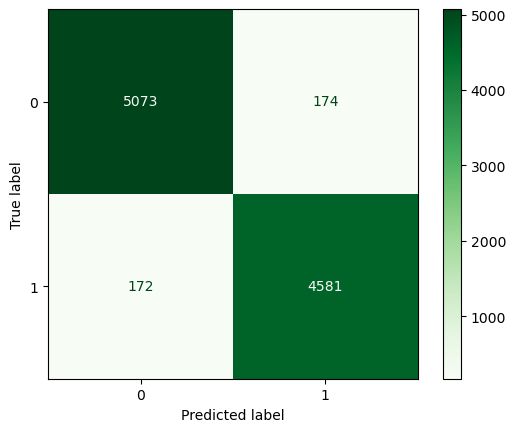

In [7]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

best_model_pred = best_model.predict(X_test)

print(f"Best Model's Accuracy score: {accuracy_score(y_test, best_model_pred)}")
print(f"Best Model's F1 score: {f1_score(y_test, best_model_pred)}")

matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, best_model_pred))
matrix.plot(cmap='Greens')